### Task 1 - deadline 7.11.2024

1) Calculate the missing data time periods in each csv file.
Data matrix with the file name, and the length of all gaps in that file.

2) Make a histogram of the missing data time periods, for all datasets. (Calculate the histogram of the missing data, showing on the y axis the frequency and on the x axis the time duration of the missing data.)
https://www.w3schools.com/python/matplotlib_histograms.asp


In [95]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
### Get all the paths

paths = []

for root, dirs, files in os.walk("data/data SPL August 2022 all", topdown=False):
   for name in files:
      paths.append(os.path.join(root, name))

In [8]:
### Generate name, gap length and occurrence table

def get_matrix():
    matrix_data = []
    
    for path in paths:
        data = pd.read_csv(path)
        data['Time'] = pd.to_datetime(data['Time'])
        diff = data['Time'].diff()
    
        zero = pd.Timedelta("0 seconds")
        one_minute = pd.Timedelta("1 minute")
        filtered_diff = diff[(diff != zero) & (diff != one_minute)]
        
        diff_counts = filtered_diff.value_counts()
        for gap_length, count in diff_counts.items():
            matrix_data.append([path, gap_length, count])
    
    matrix_df = pd.DataFrame(matrix_data, columns=['Filename', 'Gap Length', 'Occurrence'])
    
    matrix_df.to_csv('missing_data.csv', index=False)

get_matrix()

In [4]:
### Generate histogram for all data

def get_all_diffs():
    all_diffs = []
    
    for path in paths:
        data = pd.read_csv(path)
    
        data['Time'] = pd.to_datetime(data['Time'])
        diff = data['Time'].diff()
    
        zero = pd.Timedelta("0 seconds")
        one_minute = pd.Timedelta("1 minute")
        filtered_diff = diff[(diff != zero) & (diff != one_minute)]
        
        all_diffs.extend(filtered_diff.dropna().dt.total_seconds() / 60)
    return all_diffs

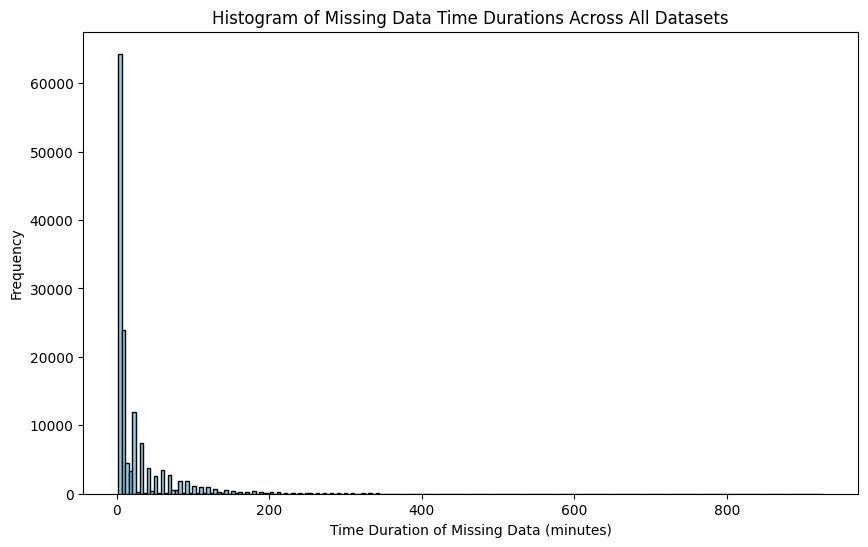

In [5]:
def plot_diffs():
    all_diffs = get_all_diffs()
    plt.figure(figsize=(10, 6))
    plt.hist(all_diffs, bins=200, color='skyblue', edgecolor='black')
    plt.xlabel("Time Duration of Missing Data (minutes)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Missing Data Time Durations Across All Datasets")
    plt.show()

plot_diffs()

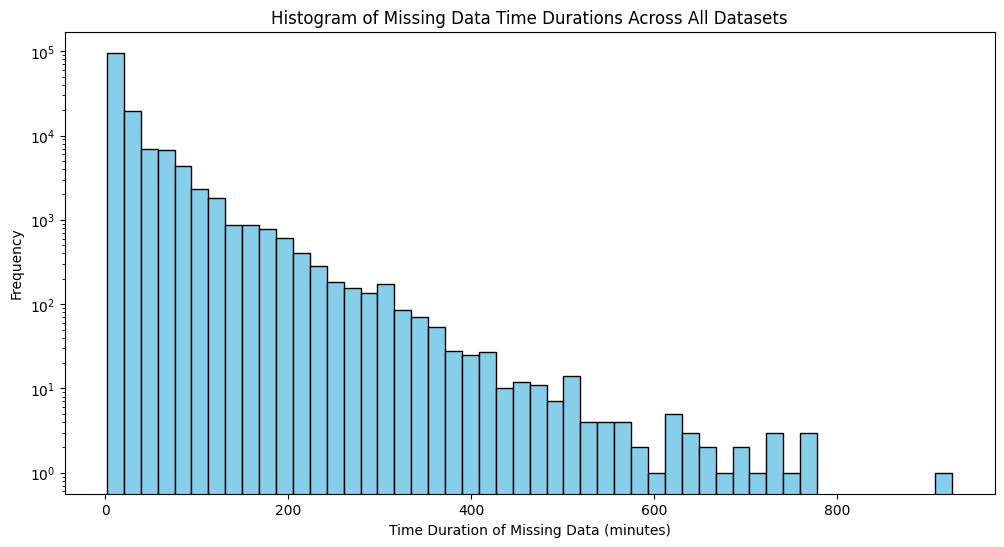

In [6]:
def plot_diffs_exponential():
    all_diffs = get_all_diffs()
    plt.figure(figsize=(12, 6))
    plt.yscale('log')
    plt.hist(all_diffs, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel("Time Duration of Missing Data (minutes)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Missing Data Time Durations Across All Datasets")
    plt.show()

plot_diffs_exponential()

Gap Length
0 days 00:02:00    263.99
0 days 00:03:00     18.07
0 days 00:04:00     24.00
0 days 00:05:00      1.00
0 days 00:06:00      1.25
                    ...  
0 days 12:11:00      1.00
0 days 12:31:00      1.00
0 days 12:41:00      1.00
0 days 12:51:00      1.00
0 days 15:26:00      1.00
Name: Occurrence, Length: 354, dtype: float64


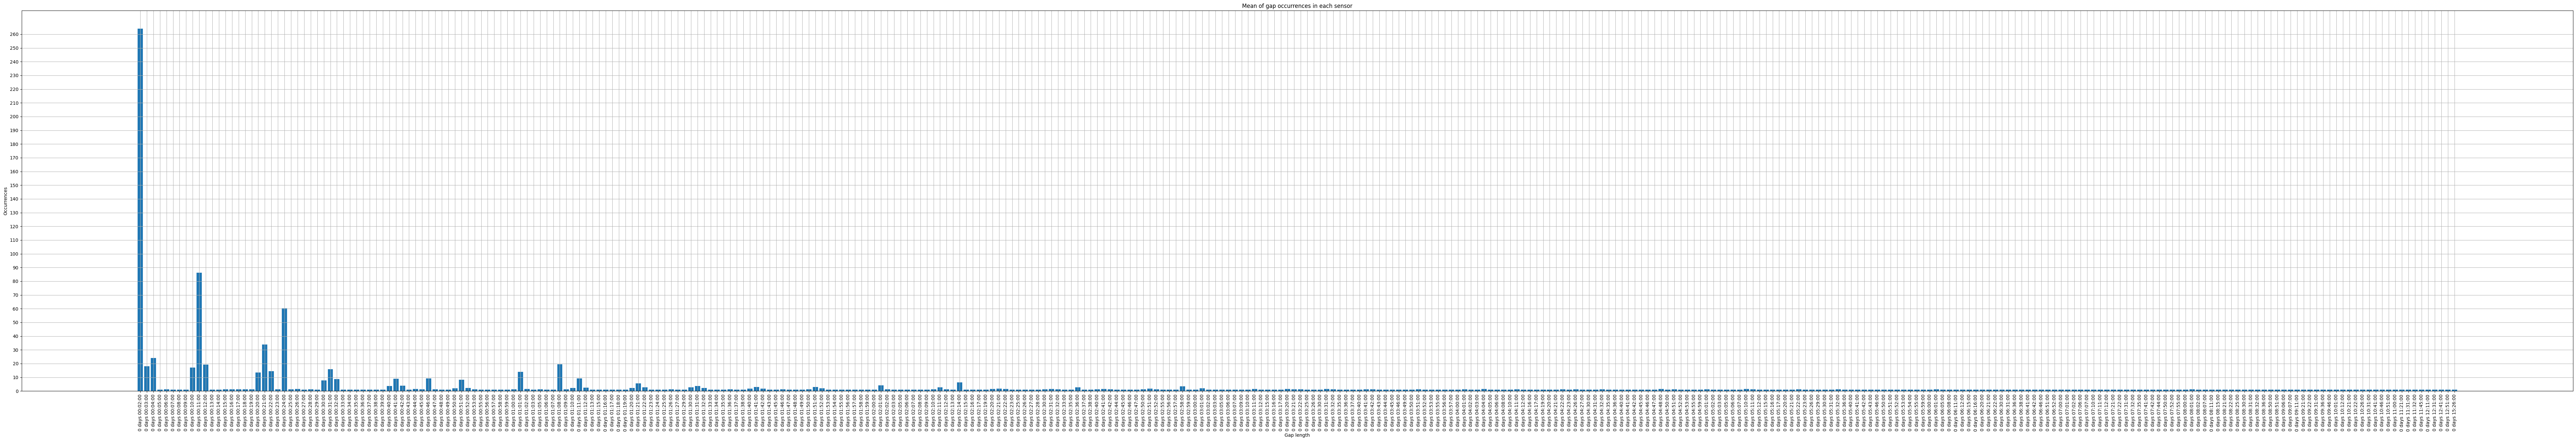

In [ ]:
def pivot_table():
    df = pd.read_csv("missing_data.csv")
    df["Filename"] = df["Filename"].str.replace("data/data SPL August 2022 all/", "", regex=False)
    df["Filename"] = df["Filename"].str.replace("-data.csv", "", regex=False)
    pivot_df = df.pivot_table(index="Filename", columns="Gap Length", values="Occurrence", fill_value=0)
    pivot_df.astype(int)
    pivot_df.to_csv("transformed_data.csv")

# pivot_table()

def generate_bar_graph_for_average_gaps():
    df = pd.read_csv("missing_data.csv")
    df["Gap Length"] = pd.to_timedelta(df["Gap Length"])
    grouped = df.groupby(df["Gap Length"])
    average_occurrence = grouped['Occurrence'].mean().round(2).astype(float)
    print(average_occurrence)

    df = df.sort_values("Gap Length")

    plt.figure(figsize=(100, 15))
    plt.bar(average_occurrence.index.astype(str), average_occurrence.values)

    plt.xlabel("Gap length")
    plt.ylabel("Occurrences")
    plt.title("Mean of gap occurrences in each sensor")
    plt.xticks(rotation=90)
    plt.yticks(range(0, np.round(max(average_occurrence.values)).astype(int) + 1, 10))
    plt.grid()
    plt.savefig("mean_occurrences.png")

    

generate_bar_graph_for_average_gaps()